In [21]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scanpy as sc
import tifffile
import yaml


In [2]:
%load_ext autoreload

In [3]:
%autoreload 2

In [18]:
from mushroom.registration.bigwarp import read_bigwarp_warp_field, register_multiplex
from mushroom.data.multiplex import extract_ome_tiff

In [11]:
run_dir = '/data/estorrs/mushroom/data/examples/HT397B1_v1'

In [12]:
metadata = yaml.safe_load(open(os.path.join(run_dir, 'registration', 'unregistered_tifs', 'metadata.yaml')))
metadata

{'data': {'he': {'HT397B1-U1': '/data/spatial_transcriptomics/highres_images/breast/A1_HT397B1-S1H3A1U1.tif',
   'HT397B1-U21': '/data/spatial_transcriptomics/highres_images/breast/B1_HT397B1-S1H3A1U21.tif'},
  'multiplex': {'HT397B1-U12': '/data/multiplex_imaging/codex/htan/brca/03172023_BRCA_HT397B1-U12/level_2/HT397B1_U12_03172023.ome.tiff',
   'HT397B1-U2': '/data/multiplex_imaging/codex/htan/brca/031623_BRCA_HT397B1-U2/level_2/HT397B1_U2_03162023.ome.tiff',
   'HT397B1-U22': '/data/multiplex_imaging/codex/htan/brca/041223_BRCA_HT397B1-S1H3A1-U22/level_2/HT397B1_S1H1A3U22_04122023.ome.tiff',
   'HT397B1-U31': '/data/multiplex_imaging/codex/htan/brca/040623_BRCA_HT397B1-U31/level_2/HT397B1_S1H1A3U31_04062023.ome.tiff'},
  'visium': {'HT397B1-U1': '/data/spatial_transcriptomics/spaceranger_outputs/breast/HT397B1-S1H3A1U1/',
   'HT397B1-U21': '/data/spatial_transcriptomics/spaceranger_outputs/breast/HT397B1-S1H3A1U21/'}},
 'ids': ['s0', 's1', 's2', 's3', 's4', 's5'],
 'order': ['HT397

In [8]:
scale = .1

In [9]:
ddf = read_bigwarp_warp_field(
    '/data/estorrs/mushroom/data/examples/HT397B1_v1/registration/registration/s1_ddf.tif',
    scale
)
ddf.shape

/data/estorrs/miniconda3/envs/mushroom-dev/lib/python3.9/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


torch.Size([2, 18640, 18370])

In [15]:
channel_to_img = extract_ome_tiff(metadata['data']['multiplex']['HT397B1-U2'], channels=['DAPI'])
img = next(iter(channel_to_img.values()))
img.shape

(17280, 16320)

In [19]:
warped_channel_to_img = register_multiplex(channel_to_img, ddf)

In [20]:
warped = next(iter(warped_channel_to_img.values()))
warped.shape

(18640, 18370)

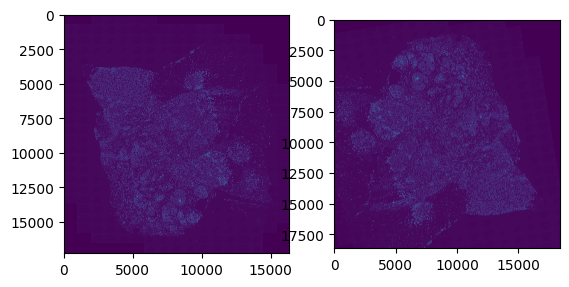

In [22]:
fig, axs = plt.subplots(ncols=2)
axs[0].imshow(img)
axs[1].imshow(warped)

In [ ]:
slice_to_ddf = {fp.split('/')[-1].split('.')[0]:read_bigwarp_warp_field(
    fp, metadata['downsample_scaler']) for fp in fps}
slice_to_ddf.keys()

In [ ]:
for sid, fp in sid_to_fp.items():
    print(sid)
    slice_id = sid_to_slice[sid]
    channel_to_img = utils.extract_ome_tiff(fp)
    
    if slice_id in slice_to_ddf:
        ddf = slice_to_ddf[slice_id]
    else:
        ddf = torch.zeros_like(next(iter(slice_to_ddf.values())))

    warped_channel_to_img = register_codex(channel_to_img, ddf)
    utils.save_ome_tiff(warped_channel_to_img, os.path.join(out_dir, f'{slice_id}.ome.tiff'))

In [ ]:
# order of tissue section in list should match the order sections were taken from the sample
config = [
    {
        'id': 'HT397B1-U1',
        'data': [ # here we have multiple data types for one slide, visium spatial transcriptomics and full res H&E
            {
                'dtype': 'visium',
                'filepath': '/data/spatial_transcriptomics/spaceranger_outputs/breast/HT397B1-S1H3A1U1/'
            },
            {
                'dtype': 'he',
                'filepath': '/data/spatial_transcriptomics/highres_images/breast/A1_HT397B1-S1H3A1U1.tif'
            }
        ]
    },
    {
        'id': 'HT397B1-U2',
        'data': []
    }
]

In [ ]:
# spaceranger output directories
section_to_visium = {
    'HT397B1-U1': '/data/spatial_transcriptomics/spaceranger_outputs/breast/HT397B1-S1H3A1U1/',
    'HT397B1-U21': '/data/spatial_transcriptomics/spaceranger_outputs/breast/HT397B1-S1H3A1U21/',
}

# hi res H&E 
section_to_he = {
    'HT397B1-U1':  '/data/spatial_transcriptomics/highres_images/breast/A1_HT397B1-S1H3A1U1.tif',
    'HT397B1-U21': '/data/spatial_transcriptomics/highres_images/breast/B1_HT397B1-S1H3A1U21.tif',
}

# codex
section_to_multiplex = {
    'HT397B1-U2': '/data/multiplex_imaging/codex/htan/brca/031623_BRCA_HT397B1-U2/level_2/HT397B1_U2_03162023.ome.tiff',
    'HT397B1-U12': '/data/multiplex_imaging/codex/htan/brca/03172023_BRCA_HT397B1-U12/level_2/HT397B1_U12_03172023.ome.tiff',
    'HT397B1-U22': '/data/multiplex_imaging/codex/htan/brca/041223_BRCA_HT397B1-S1H3A1-U22/level_2/HT397B1_S1H1A3U22_04122023.ome.tiff',
    'HT397B1-U31': '/data/multiplex_imaging/codex/htan/brca/040623_BRCA_HT397B1-U31/level_2/HT397B1_S1H1A3U31_04062023.ome.tiff',
}

In [ ]:
metadata = {
    # order of tissue sections
    'section_order': [
        'HT397B1-U1',
        'HT397B1-U2',
        'HT397B1-U12',
        'HT397B1-U21',
        'HT397B1-U22',
        'HT397B1-U31'
    ],
    # data type of each tissue section
    # can be one of ['multiplex', 'he', 'visium', 'xenium']
    # if H&E was done in addition to another data type (for example, in visium spatial transcriptomics), use the non-H&E data type
    'dtypes': [ 
        ''
    ]
}